In [1]:
import habitat
import os
import shutil

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

import habitat
from habitat.tasks.nav.shortest_path_follower import ShortestPathFollower
from habitat.utils.visualizations import maps

In [2]:
class SimpleRLEnv(habitat.RLEnv):
    def get_reward_range(self):
        return [-1, 1]

    def get_reward(self, observations):
        return 0

    def get_done(self, observations):
        return self.habitat_env.episode_over

    def get_info(self, observations):
        return self.habitat_env.get_metrics()

In [3]:
def plot_point(episode, point):
    
    top_down_map = maps.get_topdown_map(env._env.sim)
    
    MAP_THICKNESS_SCALAR = 1250
    if point == 'start':
        s_x, s_y = maps.to_grid(
        episode.start_position[0],
        episode.start_position[2],
        maps.COORDINATE_MIN,
        maps.COORDINATE_MAX,
        (1250, 1250),
        )
        point_padding = 1 * int(
            np.ceil(top_down_map.shape[0] / MAP_THICKNESS_SCALAR)
        )
#         print("COORDINATES RANGE:", maps.COORDINATE_MIN, maps.COORDINATE_MAX)
#         print("MAP_RESOLUTION:", 1250)
#         print("SOURCE POSITION REAL WORLD:", episode.start_position[0], episode.start_position[2])
#         print("SOURCE POSITION GRID WORLD:", s_x, s_y)
        
#         print("PADDING", point_padding)
        
        top_down_map[
            s_x - point_padding : s_x + point_padding + 1,
            s_y - point_padding : s_y + point_padding + 1,
        ] = maps.MAP_SOURCE_POINT_INDICATOR

    if point == 'end':
        t_x, t_y = maps.to_grid(
            episode.goals[0].position[0],
            episode.goals[0].position[2],
            maps.COORDINATE_MIN,
            maps.COORDINATE_MAX,
            (1250, 1250),
        )
        point_padding = 1 * int(
            np.ceil(top_down_map.shape[0] / MAP_THICKNESS_SCALAR)
        )
#         print("TARGET POSITION REAL WORLD:", episode.goals[0].position[0], episode.goals[0].position[2])
#         print("TARGET POSITION:", t_x, t_y)
        top_down_map[
            t_x - point_padding : t_x + point_padding + 1,
            t_y - point_padding : t_y + point_padding + 1,
        ] = maps.MAP_TARGET_POINT_INDICATOR
    
    return top_down_map

2019-07-03 17:30:43,513 initializing sim Sim-v0
I0703 17:30:43.520059 69008 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.navmesh
2019-07-03 17:30:54,530 initializing task Nav-v0


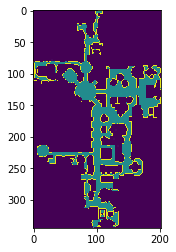

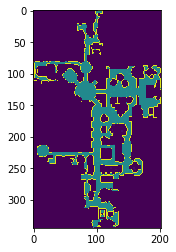

ValueError: operands could not be broadcast together with shapes (345,218) (345,202) (345,218) 

In [4]:
splits = ['val', 'train', 'test']
episode_counts = {'val':75,'train':93750,'test':50}
data_path = '../data/datasets/roomnav/mp3d/v1/{split}/{split}.json.gz'

for split in splits:
    config = habitat.get_config(config_paths="tasks/roomnav_mp3d.yaml")
    config.defrost()
    config.DATASET.DATA_PATH = data_path.format(split=split)
    config.DATASET.SCENES_DIR = '../data/scene_datasets/'
    config.TASK.MEASUREMENTS.append("TOP_DOWN_MAP")
    config.freeze()
    
    env = SimpleRLEnv(config=config)
    
    scene_count = 0
    this_scene = env.episodes[0].scene_id.strip().split('/')[-1]
    
    start_map = np.array([])
    end_map = np.array([])
    
    for i in range(len(env.episodes)):
        
        start_top_down_map = plot_point(env.episodes[i], 'start')
        
        range_x = np.where(np.any(start_top_down_map, axis=1))[0]
        range_y = np.where(np.any(start_top_down_map, axis=0))[0]

        x_min = range_x[0]
        x_max = range_x[-1]
        y_min = range_y[0]
        y_max = range_y[-1]

        start_top_down_map = start_top_down_map[x_min:x_max, y_min:y_max]

        end_top_down_map = plot_point(env.episodes[i], 'end')
        end_top_down_map = end_top_down_map[x_min:x_max, y_min:y_max]
        
        if len(start_map) == 0:
            start_map = start_top_down_map
            end_map = end_top_down_map
        
        if env.episodes[i].scene_id.strip().split('/')[-1] != this_scene:
            start_map = start_map/episode_counts[split]
            end_map = end_map/episode_counts[split]
        
            plt.imshow(start_map)
            plt.show()
            
            plt.imshow(end_map)
            plt.show()
            
            start_map = start_top_down_map
            end_map = end_top_down_map
            
            this_scene = env.episodes[i].scene_id.strip().split('/')[-1]
            scene_count += 1
            
        else:
            start_map += start_top_down_map
            end_map += end_top_down_map
            
    start_map = start_map/episode_counts[split]
    end_map = end_map/episode_counts[split]

    plt.imshow(start_map)
    plt.show()

    plt.imshow(end_map)
    plt.show()    
    
    env.close()

In [4]:

data_path = '../data/datasets/roomnav/mp3d/v1/{split}/{split}.json.gz'

# start_map = None
# end_map = None

config = habitat.get_config(config_paths="tasks/roomnav_mp3d.yaml")
config.defrost()
config.DATASET.DATA_PATH = data_path.format(split='val')
config.DATASET.SCENES_DIR = '../data/scene_datasets/'
config.TASK.MEASUREMENTS.append("TOP_DOWN_MAP")
config.freeze()

env = SimpleRLEnv(config=config)

print(len(env.episodes))

2019-07-03 17:40:31,569 initializing sim Sim-v0
I0703 17:40:31.578777 69323 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.navmesh
2019-07-03 17:40:42,623 initializing task Nav-v0


300


x_min: 474
x_max: 819
y_min: 420
y_max: 622


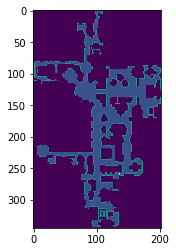

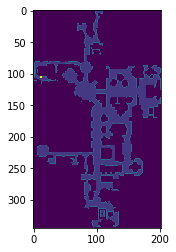

SCENE: 2azQ1b91cZZ.glb
x_min: 474
x_max: 819
y_min: 420
y_max: 622


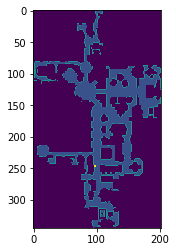

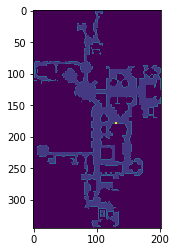

SCENE: 2azQ1b91cZZ.glb


In [6]:
# observations = env.reset()

# observations, reward, done, info = env.step(1)

scene_count = 0
this_scene = env.episodes[0].scene_id.strip().split('/')[-1]

start_top_down_map = plot_point(env.episodes[0], 'start')
# start_top_down_map = maps.get_topdown_map(env._env.sim, map_resolution=(5000,5000))
# plt.imshow(start_top_down_map)
# plt.show()

range_x = np.where(np.any(start_top_down_map, axis=1))[0]
range_y = np.where(np.any(start_top_down_map, axis=0))[0]

grid_delta = 0
x_min = range_x[0] - grid_delta
x_max = range_x[-1] + grid_delta
y_min = range_y[0] - grid_delta
y_max = range_y[-1] + grid_delta

print("x_min:", x_min)
print("x_max:", x_max)
print("y_min:", y_min)
print("y_max:", y_max)

start_top_down_map = start_top_down_map[x_min:x_max, y_min:y_max]
# start_colored_map = maps.colorize_topdown_map(start_top_down_map)
plt.imshow(start_top_down_map)
plt.show()

end_top_down_map = plot_point(env.episodes[0], 'end')

# end_top_down_map = maps.get_topdown_map(env._env.sim, map_resolution=(5000,5000))
# plt.imshow(end_top_down_map)
# plt.show()
range_x = np.where(np.any(end_top_down_map, axis=1))[0]
range_y = np.where(np.any(end_top_down_map, axis=0))[0]

x_min = range_x[0]
x_max = range_x[-1]
y_min = range_y[0]
y_max = range_y[-1]

end_top_down_map = end_top_down_map[x_min:x_max, y_min:y_max]

plt.imshow(end_top_down_map)
plt.show()

print("SCENE:",env.episodes[0].scene_id.strip().split('/')[-1])

# observations = env.reset()

# observations, reward, done, info = env.step(1)

scene_count = 0
this_scene = env.episodes[0].scene_id.strip().split('/')[-1]

start_top_down_map = plot_point(env.episodes[1], 'start')

range_x = np.where(np.any(start_top_down_map, axis=1))[0]
range_y = np.where(np.any(start_top_down_map, axis=0))[0]

grid_delta = 0
x_min = range_x[0] - grid_delta
x_max = range_x[-1] + grid_delta
y_min = range_y[0] - grid_delta
y_max = range_y[-1] + grid_delta

print("x_min:", x_min)
print("x_max:", x_max)
print("y_min:", y_min)
print("y_max:", y_max)

start_top_down_map = start_top_down_map[x_min:x_max, y_min:y_max]
plt.imshow(start_top_down_map)
plt.show()

end_top_down_map = plot_point(env.episodes[1], 'end')

range_x = np.where(np.any(end_top_down_map, axis=1))[0]
range_y = np.where(np.any(end_top_down_map, axis=0))[0]

x_min = range_x[0]
x_max = range_x[-1]
y_min = range_y[0]
y_max = range_y[-1]

end_top_down_map = end_top_down_map[x_min:x_max, y_min:y_max]

plt.imshow(end_top_down_map)
plt.show()

print("SCENE:",env.episodes[1].scene_id.strip().split('/')[-1])

In [1]:
import os
import shutil

from PIL import Image
import numpy as np

import habitat
from habitat.tasks.nav.shortest_path_follower import ShortestPathFollower
from habitat.utils.visualizations import maps

class SimpleRLEnv(habitat.RLEnv):
    def get_reward_range(self):
        return [-1, 1]

    def get_reward(self, observations):
        return 0

    def get_done(self, observations):
        return self.habitat_env.episode_over

    def get_info(self, observations):
        return self.habitat_env.get_metrics()
    
def draw_top_down_map(info, heading, output_size):
    top_down_map = maps.colorize_topdown_map(info["top_down_map"]["map"])
    original_map_size = top_down_map.shape[:2]
    map_scale = np.array(
        (1, original_map_size[1] * 1.0 / original_map_size[0])
    )
    new_map_size = np.round(output_size * map_scale).astype(np.int32)
    # OpenCV expects w, h but map size is in h, w
    top_down_map = cv2.resize(top_down_map, (new_map_size[1], new_map_size[0]))

    map_agent_pos = info["top_down_map"]["agent_map_coord"]
    map_agent_pos = np.round(
        map_agent_pos * new_map_size / original_map_size
    ).astype(np.int32)
    top_down_map = maps.draw_agent(
        top_down_map,
        map_agent_pos,
        heading - np.pi / 2,
        agent_radius_px=top_down_map.shape[0] / 40,
    )
    return top_down_map
    
def draw_top_down_map(): 
    splits = ['val', 'test', 'train']

    data_path = '../data/datasets/roomnav/mp3d/v1/{split}/{split}.json.gz'

    for split in splits:
    
        config = habitat.get_config(config_paths="tasks/roomnav_mp3d.yaml")
        config.defrost()
        config.DATASET.DATA_PATH = data_path.format(split=split)
        config.DATASET.SCENES_DIR = '../data/scene_datasets/'
        config.TASK.MEASUREMENTS.append("TOP_DOWN_MAP")
        config.TASK.SENSORS.append("HEADING_SENSOR")
        config.freeze()
        
    
        outfile = 'AverageTopDown-{split}'.format(split=split)

        env = SimpleRLEnv(config=config)
        
        
        goal_radius = env.episodes[0].goals[0].radius
        if goal_radius is None:
            goal_radius = config.SIMULATOR.FORWARD_STEP_SIZE
        
        follower = ShortestPathFollower(env.habitat_env.sim, goal_radius, False)
        follower.mode = 'greedy'

        print("Environment creation successful")
        for episode in range(len(env.episodes)):
            observations = env.reset()
            best_action = follower.get_next_action(
                env.habitat_env.current_episode.goals[0].position
            )
            observations, reward, done, info = env.step(best_action)
#             im = observations["rgb"]
#             output_size = im.shape[0]
#             heading = observations["heading"]
    
            top_down_map = maps.colorize_topdown_map(info["top_down_map"]["map"])
        
            top_down_map = Image.fromarray(top_down_map)
            return top_down_map
            top_down_map.show()
            sys.exit(0)
#             original_map_size = top_down_map.shape[:2]
#             map_scale = np.array(
#                 (1, original_map_size[1] * 1.0 / original_map_size[0])
#             )
#             new_map_size = np.round(output_size * map_scale).astype(np.int32)
#             # OpenCV expects w, h but map size is in h, w
#             top_down_map = cv2.resize(top_down_map, (new_map_size[1], new_map_size[0]))

#             map_agent_pos = info["top_down_map"]["agent_map_coord"]
#             map_agent_pos = np.round(
#                 map_agent_pos * new_map_size / original_map_size
#             ).astype(np.int32)
            
            
res = draw_top_down_map()




2019-07-03 16:18:14,511 initializing sim Sim-v0
I0703 16:18:14.516537 66422 simulator.py:78] Loaded navmesh /private/home/medhini/navigation-analysis-habitat/habitat-api/data/scene_datasets/mp3d/2azQ1b91cZZ/2azQ1b91cZZ.navmesh
2019-07-03 16:18:25,907 initializing task Nav-v0


Environment creation successful
COORDINATES RANGE: -62.324101 90.039901
MAP_RESOLUTION: (1250, 1250)
SOURCE POSITION REAL WORLD: 0.5976877212524414 5.558842658996582
SOURCE POSITION GRID WORLD: 733 556
TARGET POSITION REAL WORLD: 19.30671501159668 -9.629144668579102
TARGET POSITION: 580 432
PADDING: 2


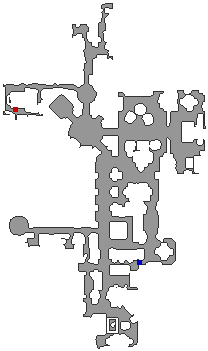

In [2]:
res

In [ ]:
YOLO COORDINATES RANGE: -62.324101 90.039901
YOLO MAP_RESOLUTION: (1250, 1250)
YOLO SOURCE POSITION REAL WORLD: 2.0708532333374023 0.7956106662750244
YOLO SOURCE POSITION GRID WORLD: 721 517
YOLO TARGET POSITION REAL WORLD: 10.323966026306152 4.899158477783203
YOLO TARGET POSITION: 653 551
YOLO PADDING: 2
    
COORDINATES RANGE: -62.324101 90.039901
MAP_RESOLUTION: 1250
SOURCE POSITION REAL WORLD: 0.5976877212524414 5.558842658996582
SOURCE POSITION GRID WORLD: 733 556
PADDING 4
TARGET POSITION REAL WORLD: 19.30671501159668 -9.629144668579102
TARGET POSITION: 580 432
    
    
    YOLO COORDINATES RANGE: -62.324101 90.039901
YOLO MAP_RESOLUTION: (1250, 1250)
YOLO SOURCE POSITION REAL WORLD: 10.69529914855957 7.605946063995361
YOLO SOURCE POSITION GRID WORLD: 650 573
YOLO TARGET POSITION REAL WORLD: 3.046595573425293 1.6201083660125732
YOLO TARGET POSITION: 713 524
YOLO PADDING: 2